In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('data-kmeans.csv')
data = dataset.values


In [19]:
data[0]

array([15, 39], dtype=int64)

### define a function to compute a distance between two points aaa and bbb

In [10]:
def compute_distance(a, b):

    dist = np.sqrt((a[0]-b[0])**2+(a[1]-b[1])**2) #distance between a and b#

    return dist


In [22]:
compute_distance(data[2],data[1])

75.0066663703967

### define a function to compute a centroid from a given set of points ZZZ

In [28]:
def compute_centroid(Z):
    x,y=0,0
    length=len(Z)
    for point in Z:
        x+=point[0]
        y+=point[1]
    center = [x/length,y/length]#centroid of a set of points in P#
    
    return center


In [31]:
test_arr=[[0,0],[1,2],[2,4]]
compute_centroid(test_arr)

[1.0, 2.0]

### define a function to determine the label of point zzz with a set of centroids MMM

In [77]:
def compute_label(z, M):
    label=0
    dist=1000000
    for i in range(len(M)):
        temp=compute_distance(z,M[i])
        if temp <dist:
            label=i
            dist=temp
        
    return label


In [38]:
compute_label([2,5],test_arr)

2

### define a function to compute the loss with a set of clusters CCC and a set of centroids MMM

In [47]:
def compute_loss(C, M):
    loss=0
    for points, centroid in zip(C,M):
        temp=0
        for point in points:
            temp+=compute_distance(point,centroid)**2
        loss+=temp/len(points)
    
    return loss


In [48]:
compute_loss([[[0,2],[0,3],[0,4]],[[0,1]]],[[0,1],[0,3]])

8.666666666666668

## plot the data points

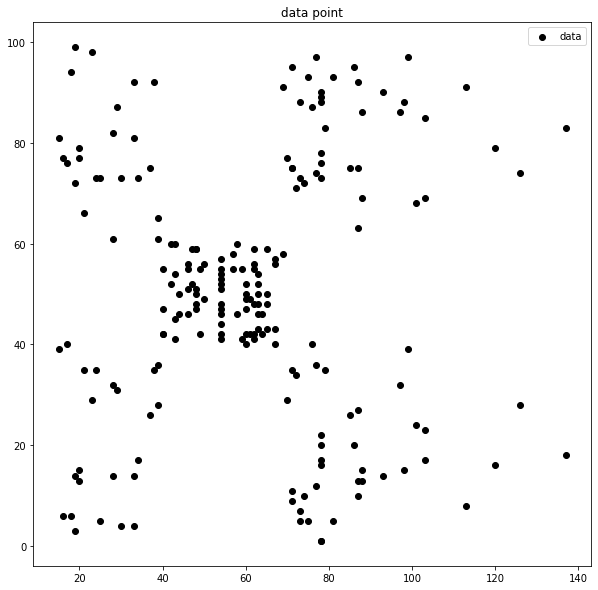

In [73]:
plt.figure(1,figsize=(10,10))
plt.title("data point")
plt.scatter(data[:,0],data[:,1],c="black",label="data")
plt.legend()
plt.show()

### random initialization

In [314]:
labels = np.random.randint(5,size=[len(data),1])

In [228]:
centroids=np.array([[0,0],[0,0],[0,0],[0,0],[0,0]])
def updateCentroids(centroids, labels):
    for i in range(5):
        idx = np.where(labels==i)
        print(compute_centroid(data[idx[0]]))
        centroids[i]=compute_centroid(data[idx[0]])
   

In [277]:
updateCentroids(centroids, labels)

[55.857142857142854, 46.63265306122449]
[58.85, 50.475]
[54.54545454545455, 54.78787878787879]
[67.19047619047619, 51.23809523809524]
[66.63888888888889, 49.333333333333336]


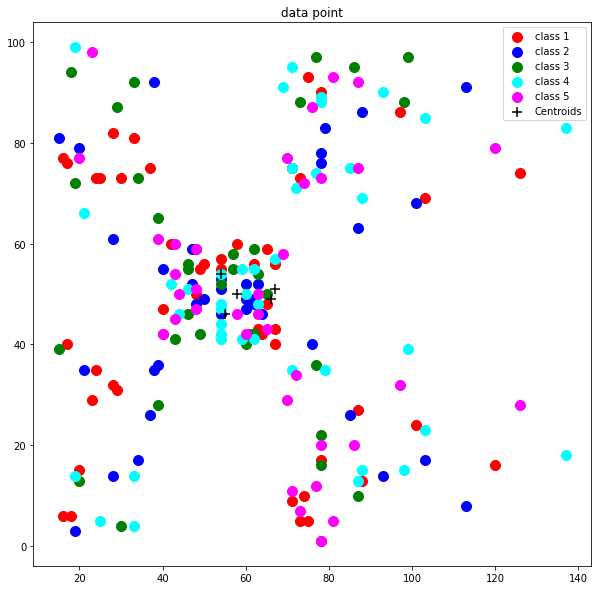

In [278]:
plt.figure(1,figsize=(10,10))
plt.title("data point")
cdict = {0: 'red', 1: 'blue', 2: 'green', 3:'cyan', 4:'magenta'}
for l in np.unique(labels):
    idx = np.where(labels==l)
    plt.scatter(data[idx[0],0],data[idx[0],1],c=cdict[l],label="class {}".format(l+1),s=100 )
plt.scatter(centroids[:,0],centroids[:,1],marker="+",s=100,c="black",label="Centroids")
plt.legend()
plt.show()

In [227]:
print("labels shape : ", np.shape(labels))
print("centroids shape : ", np.shape(centroids))
print("data shape : ", np.shape(data))


label shape :  (200, 1)
centroids shape :  (5, 2)
data shape :  (200, 2)


### plot the loss curve

In [255]:
def compute_distance(data, centroid):
    
    dist = (data[:,0]-centroid[0])**2+(data[:,1]-centroid[1])**2 #distance between a and b#

    return dist


In [260]:
def compute_distance2(data, centroid):
    
    dist = (data[0]-centroid[0])**2+(data[1]-centroid[1])**2 #distance between a and b#

    return dist


In [265]:
def compute_label(centroids):
    temp=np.zeros([len(data),len(centroids)])
    for i in range(len(centroids)):
        temp[:,i]=compute_distance(data,centroids[i])
    label=np.argmin(temp,axis=1)
        
    return label


In [263]:
def compute_loss(lables, centroids):
    loss=0
    for i, centroid in zip(range(len(centroids)),centroids):
        temp=0
        idx=np.where(labels==i)

        for point in data[idx[0]]:
            temp+=compute_distance2(point,centroid)**2
        loss+=temp/len(idx[0])
    
    return loss


In [286]:
loss=np.zeros(20)
centers=np.zeros([20,5,2])
for i in range(20):
    centers[i]=centroids
    loss[i]=compute_loss(labels,centroids)
    labels=compute_label(centroids)
    updateCentroids(centroids,labels)

[39.854166666666664, 32.229166666666664]
[60.285714285714285, 51.0]
[39.3921568627451, 66.3921568627451]
[85.91666666666667, 74.77083333333333]
[79.21739130434783, 25.23913043478261]
[30.133333333333333, 26.2]
[57.95, 49.45]
[31.818181818181817, 72.0]
[86.53846153846153, 82.12820512820512]
[87.0, 18.63157894736842]
[26.304347826086957, 20.91304347826087]
[55.833333333333336, 49.1025641025641]
[27.6, 77.08]
[86.53846153846153, 82.12820512820512]
[88.2, 17.114285714285714]
[26.304347826086957, 20.91304347826087]
[55.2962962962963, 49.51851851851852]
[25.727272727272727, 79.36363636363636]
[86.53846153846153, 82.12820512820512]
[88.2, 17.114285714285714]
[26.304347826086957, 20.91304347826087]
[55.2962962962963, 49.51851851851852]
[25.727272727272727, 79.36363636363636]
[86.53846153846153, 82.12820512820512]
[88.2, 17.114285714285714]
[26.304347826086957, 20.91304347826087]
[55.2962962962963, 49.51851851851852]
[25.727272727272727, 79.36363636363636]
[86.53846153846153, 82.12820512820512]

In [283]:
centers=np.zeros([20,5,2])
centers[0]=centroids

In [285]:
centers[1]

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

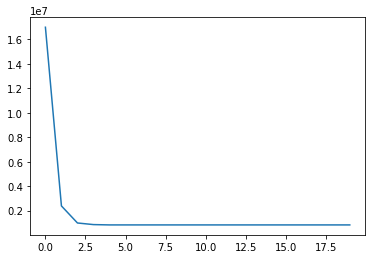

In [287]:
plt.plot(loss)

In [248]:
np.shape(compute_distance(data,[0,1]))
np.shape(data[:,0])
np.shape(data[:,0])
test=np.zeros([len(data),len(centroids)])
test[:,0]=compute_distance(data,[0,1])

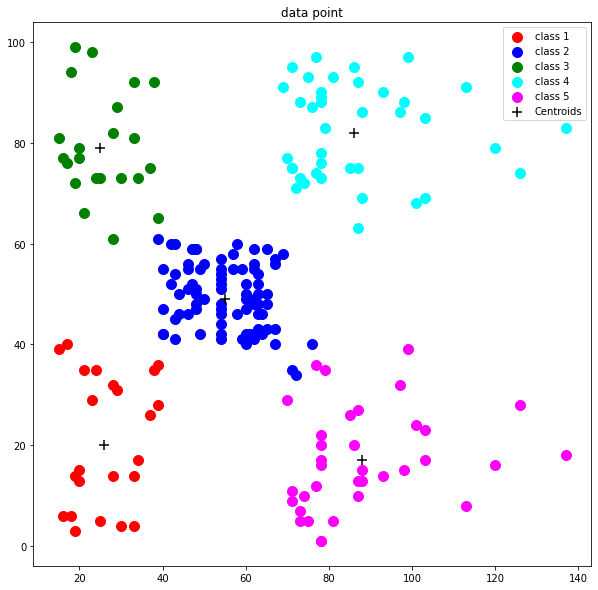

In [288]:
plt.figure(1,figsize=(10,10))
plt.title("data point")
cdict = {0: 'red', 1: 'blue', 2: 'green', 3:'cyan', 4:'magenta'}
for l in np.unique(labels):
    idx = np.where(labels==l)
    plt.scatter(data[idx[0],0],data[idx[0],1],c=cdict[l],label="class {}".format(l+1),s=100 )
plt.scatter(centroids[:,0],centroids[:,1],marker="+",s=100,c="black",label="Centroids")
plt.legend()
plt.show()

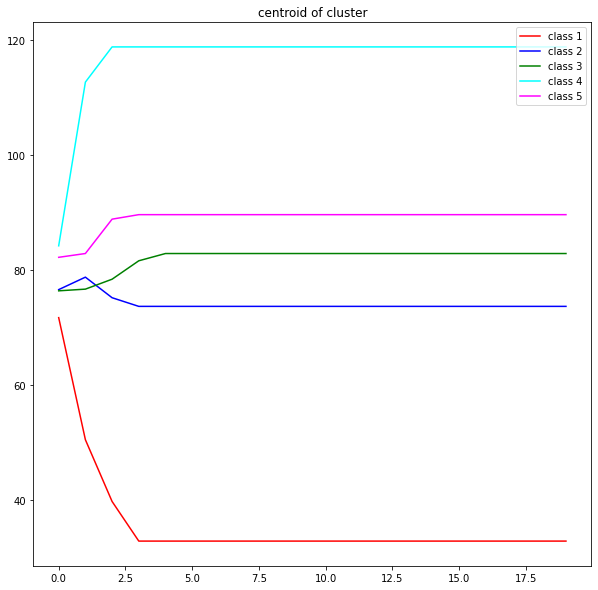

In [312]:
plt.figure(1,figsize=(10,10))
plt.title("centroid of cluster")
cdict = {0: 'red', 1: 'blue', 2: 'green', 3:'cyan', 4:'magenta'}
for i in range(5):
    plt.plot(np.sqrt(np.sum(centers[:,i,:]**2,axis=1)),c=cdict[i],label="class {}".format(i+1))

plt.legend(loc=1)
plt.show()

In [306]:
np.shape(centers)
np.sqrt(np.sum(centers[:,1,:]**2,axis=1))

array([76.57675888, 78.74642849, 75.16648189, 73.66138744, 73.66138744,
       73.66138744, 73.66138744, 73.66138744, 73.66138744, 73.66138744,
       73.66138744, 73.66138744, 73.66138744, 73.66138744, 73.66138744,
       73.66138744, 73.66138744, 73.66138744, 73.66138744, 73.66138744])

# outputs

## 1. Plot the data points [1pt]

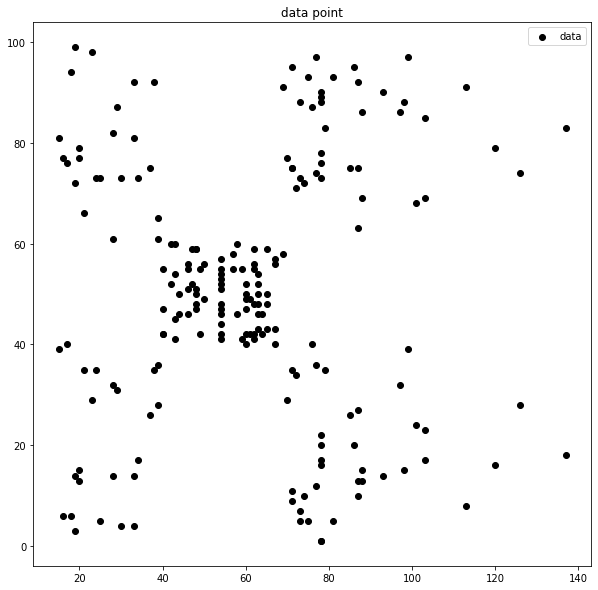

In [76]:
plt.figure(1,figsize=(10,10))
plt.title("data point")
plt.scatter(data[:,0],data[:,1],c="black",label="data")
plt.legend()
plt.show()

## 2. Visualise the initial condition of the point labels [1pt]

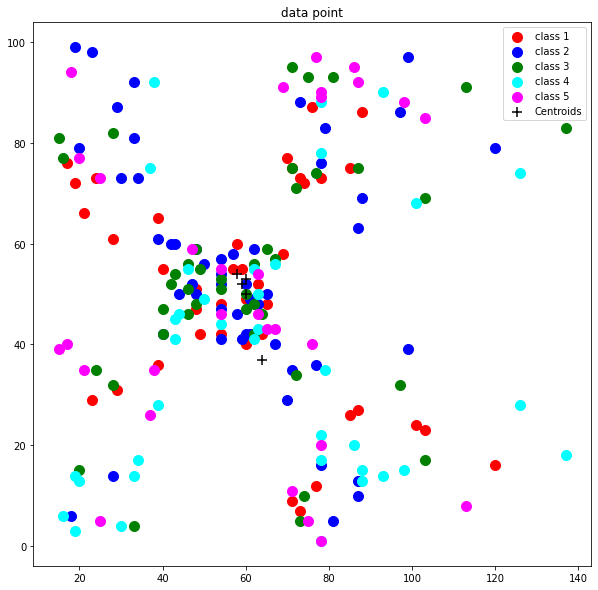

In [217]:
plt.figure(1,figsize=(10,10))
plt.title("data point")
cdict = {0: 'red', 1: 'blue', 2: 'green', 3:'cyan', 4:'magenta'}
for l in np.unique(labels):
    idx = np.where(labels==l)
    plt.scatter(data[idx[0],0],data[idx[0],1],c=cdict[l],label="class {}".format(l+1),s=100 )
plt.scatter(centroids[:,0],centroids[:,1],marker="+",s=100,c="black",label="Centroids")
plt.legend()
plt.show()

## 3. Plot the loss curve [5pt]

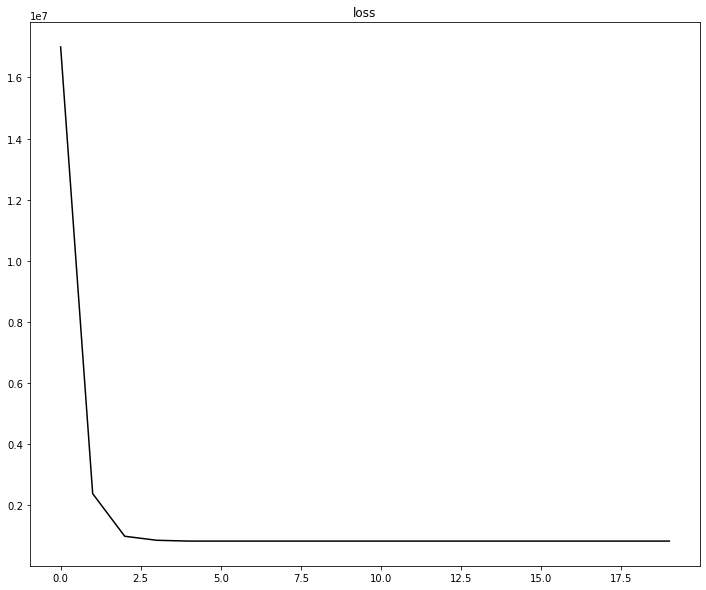

In [289]:
plt.figure(1,figsize=(12,10))
plt.title("loss")
plt.plot(loss,c="black")

## 4. Plot the centroid of each clsuter [5pt]

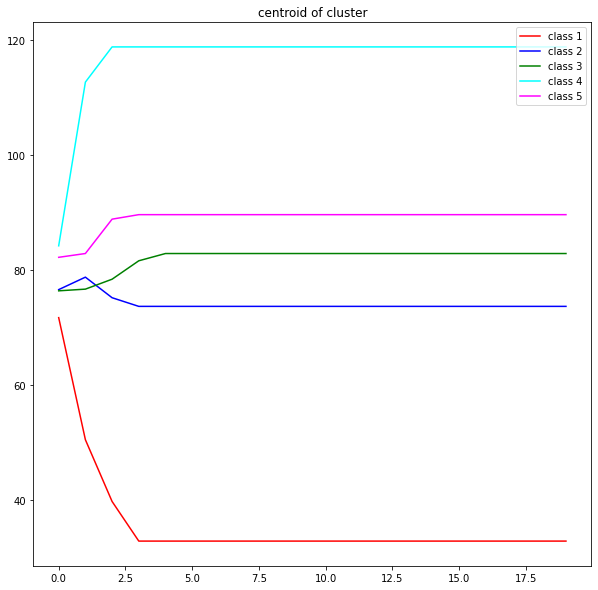

In [313]:
plt.figure(1,figsize=(10,10))
plt.title("centroid of cluster")
cdict = {0: 'red', 1: 'blue', 2: 'green', 3:'cyan', 4:'magenta'}
for i in range(5):
    plt.plot(np.sqrt(np.sum(centers[:,i,:]**2,axis=1)),c=cdict[i],label="class {}".format(i+1))

plt.legend(loc=1)
plt.show()

## 5. Plot the final clustering result [5pt]

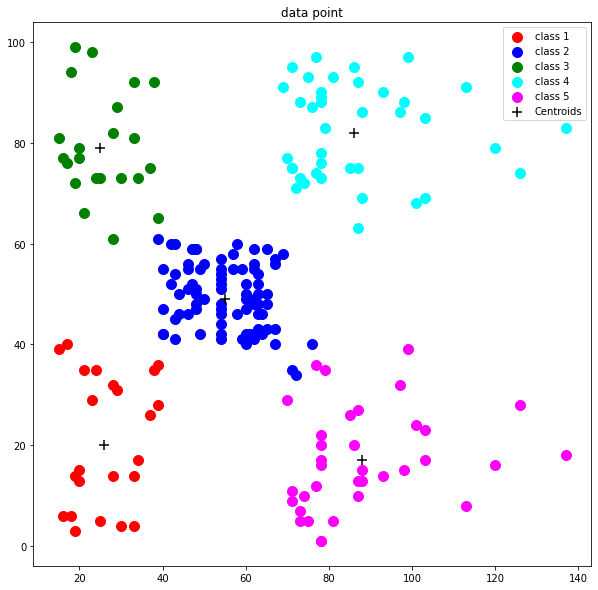

In [290]:
plt.figure(1,figsize=(10,10))
plt.title("data point")
cdict = {0: 'red', 1: 'blue', 2: 'green', 3:'cyan', 4:'magenta'}
for l in np.unique(labels):
    idx = np.where(labels==l)
    plt.scatter(data[idx[0],0],data[idx[0],1],c=cdict[l],label="class {}".format(l+1),s=100 )
plt.scatter(centroids[:,0],centroids[:,1],marker="+",s=100,c="black",label="Centroids")
plt.legend()
plt.show()